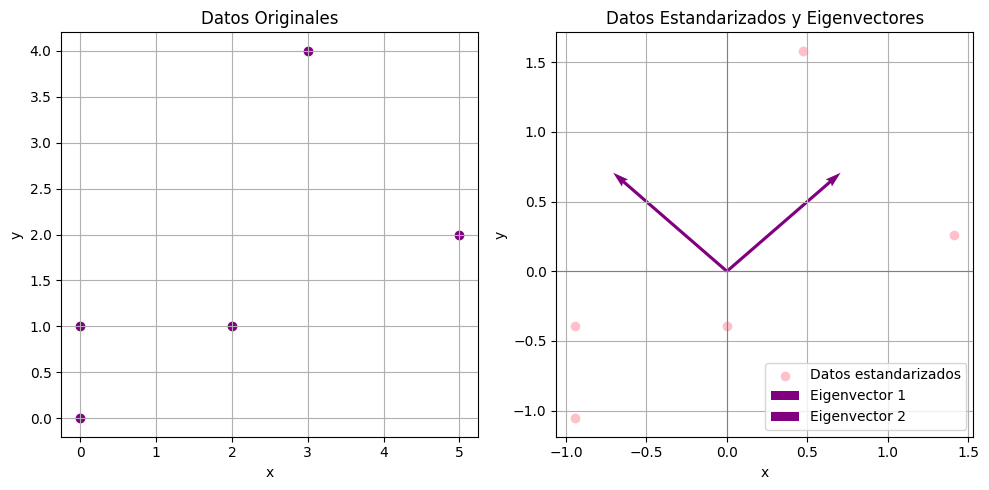

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0, 2, 3, 5])
y = np.array([0, 1, 1, 4, 2])

# Crear el DataFrame a partir de los arrays
df = pd.DataFrame({'x': x, 'y': y})

# Estandarizar las columnas del DataFrame
df_estandarizado = (df - df.mean()) / df.std()

# Calcular la matriz de varianza-covarianza
matriz_varianza_covarianza = df_estandarizado.cov()

# Calcular los eigenvalores y eigenvectores
eigenvalores, eigenvectores = np.linalg.eig(matriz_varianza_covarianza)

# Ordenar eigenvalores y eigenvectores de manera decreciente
indices_ordenados = np.argsort(eigenvalores)[::-1]
eigenvalores_ordenados = eigenvalores[indices_ordenados]
eigenvectores_ordenados = eigenvectores[:, indices_ordenados]

# Crear la figura
plt.figure(figsize=(10, 5))

# Subplot 1: Datos originales
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], color='purple', label='Datos originales')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Originales')
plt.grid()

# Subplot 2: Datos estandarizados y eigenvectores
plt.subplot(1, 2, 2)
plt.scatter(df_estandarizado['x'], df_estandarizado['y'], color='pink', label='Datos estandarizados')

# Graficar los eigenvectores
for i in range(len(eigenvalores_ordenados)):
    vector = eigenvectores_ordenados[:, i]
    plt.quiver(0, 0, vector[0], vector[1],
               angles='xy', scale_units='xy', scale=1, color='purple',
               label=f'Eigenvector {i+1}')

plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Estandarizados y Eigenvectores')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
